In [194]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import os

IMAGES_DIR_PATH = os.getcwd() + "/images/"

In [195]:
gray = cv2.imread(IMAGES_DIR_PATH + "cup_of_coffee.jpg", cv2.IMREAD_GRAYSCALE)

In [196]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [197]:
sift = cv2.SIFT_create()

In [198]:
key_points, descriptors = sift.detectAndCompute(gray, None)

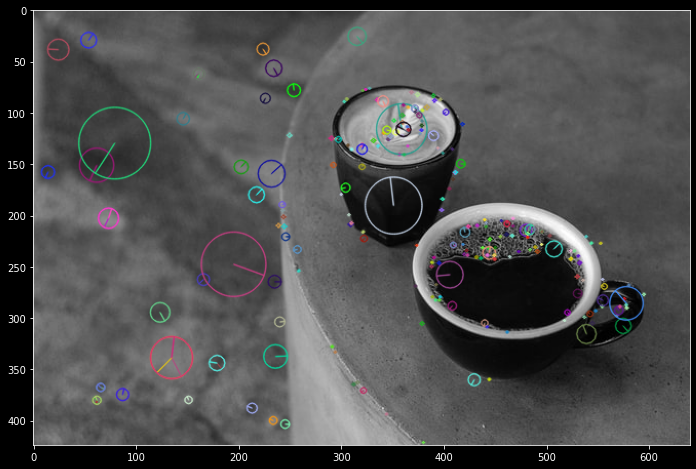

In [199]:
img = cv2.drawKeypoints(gray, key_points, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img)

In [200]:
first = cv2.imread(IMAGES_DIR_PATH + "cup_of_coffee.jpg", cv2.IMREAD_GRAYSCALE)
second = cv2.imread(IMAGES_DIR_PATH + "cup_of_coffee_changed.jpg", cv2.IMREAD_GRAYSCALE)
print(first.shape, second.shape)

(424, 640) (410, 414)


In [201]:
kp1, des1 = sift.detectAndCompute(first, None)
kp2, des2 = sift.detectAndCompute(second, None)

In [202]:
class MyBFMatcher:

    def __init__(self, dist="euclidean"):
        self.dist = dist

    def match(self, query_des: np.ndarray, train_des: np.ndarray):
        matched = []
        for queryIdx, qv in enumerate(query_des):
            min_dist = float("inf")
            min_idx = 0
            for trainIdx, tv in enumerate(train_des):
                dist = self._euclidean(qv, tv)
                if dist < min_dist:
                    min_dist, min_idx = dist, trainIdx
            matched.append(cv2.DMatch(queryIdx, min_idx, min_dist))
        return matched

    def _euclidean(self, qv: np.ndarray, tv: np.ndarray):
        return np.sqrt(np.sum((qv - tv) ** 2))

    def _norm_correlation(self, qv: np.ndarray, tv: np.ndarray):
        pass

In [203]:
def show(img1, kp1, img2, kp2, matches):
    out = cv2.drawMatches(first, kp1, second, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    fig, ax = plt.subplots(figsize=(16, 20))
    ax.imshow(out)

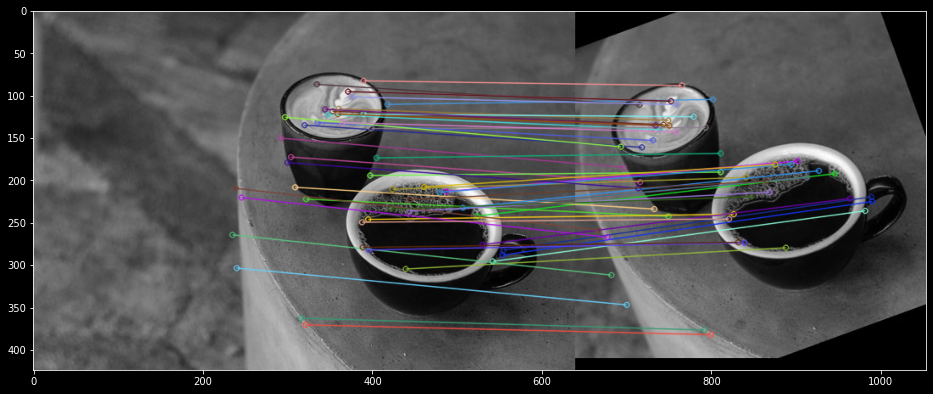

In [204]:
bf = cv2.BFMatcher()
matches1 = bf.match(des1, des2)
matches1 = sorted(matches1, key=lambda x: x.distance)
show(first, kp1, second, kp2, matches1[:50])

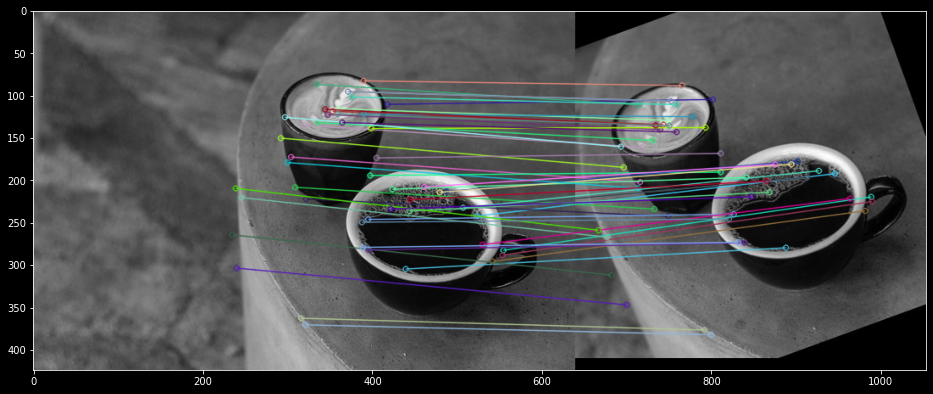

In [205]:
mbf = MyBFMatcher()
matches2 = mbf.match(des1, des2)
matches2 = sorted(matches2, key = lambda x:x.distance)
show(first, kp1, second, kp2, matches2[:50])